<a href="https://colab.research.google.com/github/YS-arch/peptide_half_life_prediction/blob/main/data_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 导入包

In [495]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [496]:
cd /content/drive/MyDrive/Peptide half-life/data

/content/drive/MyDrive/Peptide half-life/data


In [497]:
!ls

peplife.csv  pepthedia.csv  thpdb.xlsx


In [498]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import *
plt.rcParams['font.sans-serif'] = ['SimHei']   #解决中文显示问题
plt.rcParams['axes.unicode_minus'] = False    # 解决中文显示问题

# 定义相关函数

In [499]:
def summary(df):
    #输出相关统计信息
    print("总行数为 : {}\n".format(len(df)))
    print('--------------------------------------')
    print("第一个数据点:\n")
    print(df.iloc[0,:])



def dropNullRow(df,field):
    #根据field列是否为nan删除数据
    tmp=df[df[field].isnull()==False]
    tmp=tmp[df[field]!='N.A.']
    tmp=tmp[df[field]!='nan']
    print("已删除 {} 行".format(len(df)-len(tmp)))
    return tmp

def printColData(df,field):
    #输出field列的相关内容
    skip=int(len(df)/10)
    print(df[field][::skip])

def getUniqueIndex(df,field):
    #根据field列分类index
    res=defaultdict(list)
    for i in range(len(df)):
        res[df.iloc[i,:][field]].append(i)
    return res


# 读取数据,根据以下内容的有无过滤数据
- 半衰期
- 肽序列
- 测定环境
- (实验方法)
- (模型需要的输入特征)

### peplife

In [500]:
peplife=pd.read_csv("peplife.csv")
summary(peplife)

总行数为 : 2200

--------------------------------------
第一个数据点:

Unnamed: 0                                                                0
PEPlife ID                                                             1001
PMID                            http://www.ncbi.nlm.nih.gov/pubmed/20844765
YEAR                                                                   2010
SEQUENCE                                                             RRWQWR
NAME                                                                   Lfc1
LENGTH                                                                    6
N-TER MODIFICATION                                                     Free
C-TER MODIFICATION                                                     Free
LINEAR/CYCLIC                                                        Linear
STEREO-CHEMISTRY                                                          L
CHEMICAL MODIFICATIONS                                                 None
ORIGIN                     

In [501]:
peplife=dropNullRow(peplife,"Converted Half-life")  #删除无半衰期的行

已删除 0 行


In [502]:
peplife=dropNullRow(peplife,"SEQUENCE")  #删除无肽序列的行

已删除 0 行


In [503]:
peplife=dropNullRow(peplife,'TEST SAMPLE')  #删除无测定环境的行

已删除 2 行


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


### pepthedia
- 测定环境依据 ROUTE OF ADMINISTRATION 筛选

In [504]:
pepthedia=pd.read_csv("pepthedia.csv")
summary(pepthedia)

总行数为 : 112

--------------------------------------
第一个数据点:

Unnamed: 0                                                                        0
id                                                                                1
Therapeutic                       Treatment of myocardial infarction and acute c...
YEAR                                                                           1998
AGENCY                                                                          FDA
COUNTRY                                                                          US
Design                                                                     Analogue
Origin                            Disintegrin protein from venom of the Southeas...
Production Method                                                         Synthesis
ROUTE OF ADMINISTRATION                                                          IV
TERMINAL HALF-LIFE                                                        2.5 hours
PROTEIN BINDING 

In [505]:
pepthedia=dropNullRow(pepthedia,"TERMINAL HALF-LIFE")    #删除无半衰期的行

已删除 0 行


In [506]:
pepthedia=dropNullRow(pepthedia,"SEQUENCE")         #删除无肽序列的行

已删除 0 行


In [507]:
pepthedia=dropNullRow(pepthedia,"ROUTE OF ADMINISTRATION")  #删除无给药途径的行

已删除 0 行


### thpdb
- 测定环境依据 Route of administration 筛选

In [508]:
thpdb=pd.read_excel("thpdb.xlsx")
summary(thpdb)

总行数为 : 852

--------------------------------------
第一个数据点:

ID                                                                         1001
ThPP ID                                                                  Th1001
Therapeutic peptide Name                                              Lepirudin
Peptide Sequence              LVYTDCTESGQNLCLCEGSNVCGQGNKCILGSDGEKNQCVTGEGTP...
Mode of Activity                                                             Ia
Molecular Weight (Daltons)                                             6963.425
Chemical Formula                                              C287H440N80O110S6
Isoelectric Point                                                          4.04
Hydrophobicity                                                           -0.777
Melting Point (Å Åá                                                          65
Half-Life                                               Approximately 1.3 hours
Description                   Lepirudin is identical to natu

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [509]:
thpdb=dropNullRow(thpdb,'Half-Life')        #删除无半衰期的行

已删除 237 行


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [510]:
thpdb=dropNullRow(thpdb,'Peptide Sequence')     #删除无肽序列的行

已删除 139 行


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [511]:
thpdb=dropNullRow(thpdb,'Route of administration')      #删除无给药途径的行

已删除 292 行


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


# 统计以下信息
- 是否是修饰肽
- 修饰肽类型
- 测定环境
- 测定对象

## peplife
- 有关修饰肽的信息:
    - LINEAR/CYCLIC
    - N-TER MODIFICATION
    - C-TER MODIFICATION
    - CHEMICAL MODIFICATIONS
- 有关测定环境/测定对象的信息:
    - TEST SAMPLE

In [512]:
summary(peplife)

总行数为 : 2198

--------------------------------------
第一个数据点:

Unnamed: 0                                                                0
PEPlife ID                                                             1001
PMID                            http://www.ncbi.nlm.nih.gov/pubmed/20844765
YEAR                                                                   2010
SEQUENCE                                                             RRWQWR
NAME                                                                   Lfc1
LENGTH                                                                    6
N-TER MODIFICATION                                                     Free
C-TER MODIFICATION                                                     Free
LINEAR/CYCLIC                                                        Linear
STEREO-CHEMISTRY                                                          L
CHEMICAL MODIFICATIONS                                                 None
ORIGIN                     

In [513]:
"""
将 (N-TER MODIFICATION=Free,
    C-TER MODIFICATION=Free,
    CHEMICAL MODIFICATIONS=None)
判定为非修饰肽
"""

N_TER_MODIFICATION=getUniqueIndex(peplife,'N-TER MODIFICATION')
N_TER_MODIFICATION_Free=N_TER_MODIFICATION['Free']

C_TER_MODIFICATION=getUniqueIndex(peplife,'C-TER MODIFICATION')
C_TER_MODIFICATION_Free=C_TER_MODIFICATION['Free']

CHEMICAL_MODIFICATIONS=getUniqueIndex(peplife,'CHEMICAL MODIFICATIONS')
CHEMICAL_MODIFICATIONS_None=CHEMICAL_MODIFICATIONS['None']

len(N_TER_MODIFICATION_Free),len(C_TER_MODIFICATION_Free),len(CHEMICAL_MODIFICATIONS_None)

(1475, 1021, 1538)

In [514]:
modification_Free_peplife=[]

for i in range(len(peplife)):
    if i in N_TER_MODIFICATION_Free and i in C_TER_MODIFICATION_Free and i in CHEMICAL_MODIFICATIONS_None:
        modification_Free_peplife.append(i)
len(modification_Free_peplife)

678

([<matplotlib.patches.Wedge at 0x7f5ed4a83150>,
 [Text(0.7388444919062712, 0.8149287188335949, 'N_TER_MODIFICATION_Free'),
  Text(-0.6877135203753832, 0.8585162280894273, 'C_TER_MODIFICATION_Free'),
  Text(-0.9365850313828401, -0.5768955529293015, 'CHEMICAL_MODIFICATIONS_None'),
  Text(0.7178642548825479, -0.8334692025275586, 'modification_peplife')],
 [Text(0.40300608649432973, 0.4445065739092335, '1475.0'),
  Text(-0.37511646565929996, 0.46828157895786937, '1021.0'),
  Text(-0.5108645625724582, -0.3146703015978008, '1538.0'),
  Text(0.39156232084502607, -0.45461956501503187, '1520.0')])

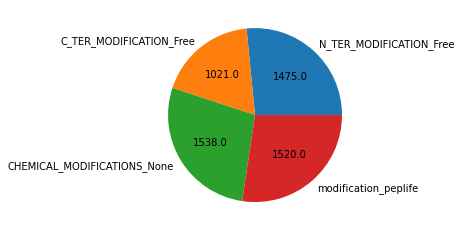

In [515]:
x=[len(N_TER_MODIFICATION_Free),len(C_TER_MODIFICATION_Free),len(CHEMICAL_MODIFICATIONS_None),len(peplife)-len(modification_Free_peplife)]
labels=['N_TER_MODIFICATION_Free','C_TER_MODIFICATION_Free','CHEMICAL_MODIFICATIONS_None','modification_peplife']
plt.pie(x,labels=labels,autopct=lambda val:np.round((val/100)*sum(x), 0))

([<matplotlib.patches.Wedge at 0x7f5ed3003650>,
 [Text(1.0952562547568894, 0.10204771636794263, 'Human serum'),
  Text(1.0789786765274634, 0.21402106344713825, ''),
  Text(1.0734604017549059, 0.24017236698712133, ''),
  Text(1.0691833857923072, 0.25854765043546307, ''),
  Text(1.0584122020585363, 0.29960575851208254, 'DPP IV'),
  Text(1.004302260580102, 0.4487504533632217, 'Human plasma'),
  Text(0.9473440238642381, 0.5590521446597929, ''),
  Text(0.9433246113950314, 0.565807986455134, ''),
  Text(0.9408898255647443, 0.5698476429263748, ''),
  Text(0.9392570215910806, 0.5725349311542942, ''),
  Text(0.9376165424384273, 0.5752175408884965, ''),
  Text(0.9359684015120299, 0.5778954502079211, ''),
  Text(0.9343126122797428, 0.5805686372299171, ''),
  Text(0.9326491882719186, 0.5832370801104227, ''),
  Text(0.9309781430812977, 0.5859007570441422, ''),
  Text(0.8735652740968572, 0.6684936139501131, 'Rat plasma'),
  Text(0.8088477984596094, 0.7454966391118362, ''),
  Text(0.7991913238904109,

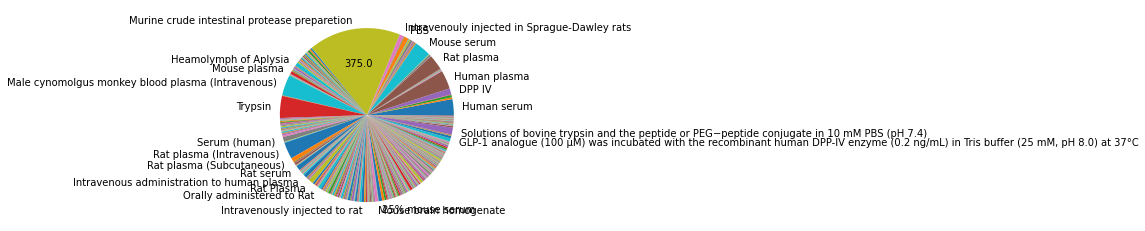

In [535]:
TEST_SAMPLE=getUniqueIndex(peplife,'TEST SAMPLE')  #498种测试环境

threshold=10  #画饼状图时显示标签的阈值

x=[len(value) for value in TEST_SAMPLE.values()]
labels=[key if len(value)>threshold else '' for key,value in TEST_SAMPLE.items()]
plt.pie(x,labels=labels,autopct=lambda val:np.round((val/100)*sum(x), 0) if val>threshold else '')

## pepthedia
- 有关修饰肽的信息:
    - Design
    - N-TERMINUS
    - C-TERMINUS
    - LIPIDATION
    - GLYCOSYLATION
- 有关测定环境的信息:
    - ROUTE OF ADMINISTRATIO

In [517]:
summary(pepthedia)

总行数为 : 112

--------------------------------------
第一个数据点:

Unnamed: 0                                                                        0
id                                                                                1
Therapeutic                       Treatment of myocardial infarction and acute c...
YEAR                                                                           1998
AGENCY                                                                          FDA
COUNTRY                                                                          US
Design                                                                     Analogue
Origin                            Disintegrin protein from venom of the Southeas...
Production Method                                                         Synthesis
ROUTE OF ADMINISTRATION                                                          IV
TERMINAL HALF-LIFE                                                        2.5 hours
PROTEIN BINDING 

In [518]:
"""
将 (N-TERMINUS=H,
    C-TERMINUS=OH,
    LIPIDATION=no,
    GLYCOSYLATION=no)
判定为非修饰肽
"""


N_TERMINUS=getUniqueIndex(pepthedia,'N-TERMINUS')
N_TERMINUS_H=N_TERMINUS['H']

C_TERMINUS=getUniqueIndex(pepthedia,'C-TERMINUS')
C_TERMINUS_OH=C_TERMINUS['OH']

LIPIDATION=getUniqueIndex(pepthedia,'LIPIDATION')
LIPIDATION_no=LIPIDATION['no']

GLYCOSYLATION=getUniqueIndex(pepthedia,'GLYCOSYLATION')
GLYCOSYLATION_no=GLYCOSYLATION['no']

len(N_TERMINUS_H),len(C_TERMINUS_OH),len(LIPIDATION_no),len(GLYCOSYLATION_no)

(47, 41, 97, 105)

In [519]:
modification_Free_peplife=[]

for i in range(len(peplife)):
    if i in N_TERMINUS_H and i in C_TERMINUS_OH and i in LIPIDATION_no and i in GLYCOSYLATION_no:
        modification_Free_peplife.append(i)
len(modification_Free_peplife)

18

([<matplotlib.patches.Wedge at 0x7f5ed4a27c90>,
 [Text(1.0196773372941332, 0.4126234697744987, 'N_TERMINUS_H'),
  Text(0.49457243962190117, 0.9825467428913706, 'C_TERMINUS_OH'),
  Text(-0.6767547496386894, 0.8671810703892671, 'LIPIDATION_no'),
  Text(-0.8089754554294919, -0.7453581102481184, 'GLYCOSYLATION_no'),
  Text(0.7904397676204606, -0.7649869108449584, 'modification_peplife')],
 [Text(0.5561876385240726, 0.22506734714972654, '47.0'),
  Text(0.2697667852483097, 0.5359345870316566, '41.0'),
  Text(-0.369138954348376, 0.4730078565759638, '97.0'),
  Text(-0.44125933932517736, -0.40655896922624635, '105.0'),
  Text(0.43114896415661486, -0.4172655877336136, '94.0')])

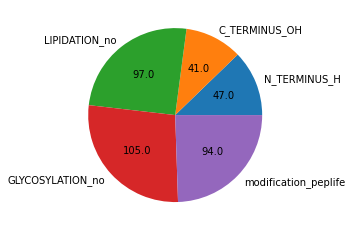

In [520]:
x=[len(N_TERMINUS_H),len(C_TERMINUS_OH),len(LIPIDATION_no),len(GLYCOSYLATION_no),len(pepthedia)-len(modification_Free_peplife)]

labels=['N_TERMINUS_H','C_TERMINUS_OH','LIPIDATION_no','GLYCOSYLATION_no','modification_peplife']

plt.pie(x,labels=labels,autopct=lambda val:np.round((val/100)*sum(x), 0))

([<matplotlib.patches.Wedge at 0x7f5ed237bf50>,
 [Text(0.6858387475358717, 0.8600146582346299, 'IV'),
  Text(-0.30451915004473196, 1.0570090289378016, ''),
  Text(-0.39228377484406984, 1.0276738003832186, ''),
  Text(-0.44928877202020806, 1.0040615515677183, ''),
  Text(-0.5048801403723794, 0.9772901533616137, ''),
  Text(-0.5588829688732883, 0.9474438384956542, ''),
  Text(-0.6111273446301616, 0.9146165145268742, ''),
  Text(-0.6614488874936177, 0.8789114683706519, ''),
  Text(-0.7329813200826597, 0.8202063060047038, ''),
  Text(-0.7993264347826174, 0.7556965334429622, ''),
  Text(-0.860014706394271, 0.6858386871455824, ''),
  Text(-0.9146166432670646, 0.6111271519568472, ''),
  Text(-1.0982694902293342, -0.06167760396934051, 'SC'),
  Text(-0.8404410496275696, -0.709689257422507, ''),
  Text(-0.7993262844315933, -0.7556966924744238, ''),
  Text(-0.7556965427977552, -0.7993264259384402, ''),
  Text(-0.709689100046955, -0.840441182519362, ''),
  Text(-0.6614487126281402, -0.878911599970

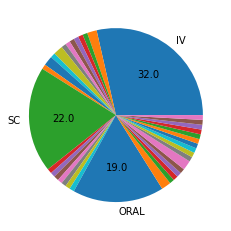

In [536]:
administration=getUniqueIndex(pepthedia,'ROUTE OF ADMINISTRATION')

threshold=2

x=[len(value) for value in administration.values()]
labels=[key if len(value)>threshold else '' for key,value in administration.items()]
plt.pie(x,labels=labels,autopct=lambda val:np.round((val/100)*sum(x), 0) if val>threshold else '')

## thpdb
- 有关测定环境的信息:
    - ROUTE OF ADMINISTRATIO

In [522]:
summary(thpdb)

总行数为 : 184

--------------------------------------
第一个数据点:

ID                                                                         1001
ThPP ID                                                                  Th1001
Therapeutic peptide Name                                              Lepirudin
Peptide Sequence              LVYTDCTESGQNLCLCEGSNVCGQGNKCILGSDGEKNQCVTGEGTP...
Mode of Activity                                                             Ia
Molecular Weight (Daltons)                                             6963.425
Chemical Formula                                              C287H440N80O110S6
Isoelectric Point                                                          4.04
Hydrophobicity                                                           -0.777
Melting Point (Å Åá                                                          65
Half-Life                                               Approximately 1.3 hours
Description                   Lepirudin is identical to natu

In [523]:
printColData(thpdb,'Half-Life')

0                                Approximately 1.3 hours
134    Approximately 40 hours (range 22 to 60 hours) ...
198         26 hours (mammalian reticulocytes, in vitro)
340                                             10 hours
405        0.8 hours (mammalian reticulocytes, in vitro)
455    The elimination half-life following both intra...
510              Adults (18-65 years) = 425 ± 78 minutes
622                   Elimination half-life of 5.6 hours
696                                Approximately 5 days.
785       >20 hours (mammalian reticulocytes, in vitro).
834    The mean terminal half-life is about 29 ± 6 ho...
Name: Half-Life, dtype: object


([<matplotlib.patches.Wedge at 0x7f5ed22bbbd0>,
 [Text(1.0233062860289162, 0.40353964485996435, 'Intravenous infusion'),
  Text(0.7778174524779029, 0.7778174661325016, ''),
  Text(0.36836756785030966, 1.0364870162988284, 'Subcutaneous Injection'),
  Text(-0.18690142380732652, 1.0840054694413652, 'Injection'),
  Text(-0.3327660058358085, 1.0484592435379083, ''),
  Text(-0.38600987077338383, 1.0300467851828459, ''),
  Text(-0.4209517770883147, 1.0162674851465976, ''),
  Text(-0.4554028724430396, 1.0013032626385618, ''),
  Text(-0.6646600288076978, 0.8764856223038404, 'Intravenous  Injection'),
  Text(-0.8532824190683902, 0.6941967396270284, ''),
  Text(-0.8877056399560017, 0.6495988737600349, ''),
  Text(-0.919800337217401, 0.6032970575551945, ''),
  Text(-0.9494823238682031, 0.5554127444179121, ''),
  Text(-0.9678912049479842, 0.5226725699559329, ''),
  Text(-0.9933822071796367, 0.47243178392114316, ''),
  Text(-1.0162674876098694, 0.42095177114145066, ''),
  Text(-1.030046787441649, 0.

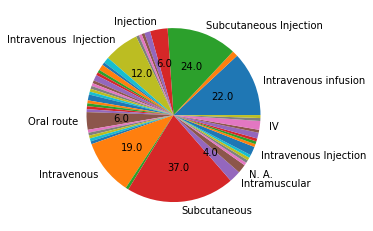

In [537]:
administration=getUniqueIndex(thpdb,'Route of administration')

threshold=2

x=[len(value) for value in administration.values()]
labels=[key if len(value)>threshold else '' for key,value in administration.items()]
plt.pie(x,labels=labels,autopct=lambda val:np.round((val/100)*sum(x), 0) if val>threshold else '')